In [1]:
# add library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline   
import seaborn as sns
import warnings
import matplotlib as mpl
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from skrebate import ReliefF
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier



In [2]:
df = pd.read_csv("D:/Na/ReGeneL/gene_diff_data.csv")
sid =list(df["SID"])
deg_genes_ID = df["SID"]
gse = pd.read_csv("D:/Na/ReGeneL/GSE66099.csv")
list1= ["SID"] + sid + ["Died"]
deg_genes = gse[list1]
deg_genes = deg_genes.iloc[: , 1:]
deg_genes

,SLC39A8,RHAG,DDIT4,MPO,RRM2,CCL3,TGFBI,MAFF,TYMS,ENPP2,...,FEN1,AURKA,FRAT1,SNRPG,KIF2C,POLE2,UBE2C,AURKB,CENPF,Died
0,7.837760,4.112866,8.046405,2.324069,4.759059,3.140721,4.143039,8.578116,5.230842,3.862937,...,4.062130,3.009849,8.785775,9.787393,2.240854,2.622261,4.787508,3.002504,2.246339,1
1,7.751983,1.485795,8.971049,5.258546,7.684430,2.811141,4.977650,4.715507,7.567845,3.212268,...,4.651380,4.084429,8.823993,9.877403,3.083158,2.470562,5.049623,2.667229,3.301098,0
2,10.279053,1.925620,8.712714,1.856427,5.890788,5.947866,4.036440,9.109963,6.066830,3.086101,...,3.554817,2.921564,8.135534,10.673182,2.399208,2.270243,4.136699,3.181530,2.663032,1
3,9.601609,5.888388,8.527441,5.750055,8.206514,5.134266,4.616064,5.156271,8.057016,2.684719,...,5.330526,4.034944,7.884369,9.025149,3.205451,2.998327,5.846744,3.883344,3.662963,1
4,7.785195,4.846312,9.301229,8.695507,10.032503,6.555199,6.542890,8.041716,9.813448,7.125344,...,6.783366,6.314857,8.603358,10.328848,4.966912,4.004817,6.864789,5.244933,4.199692,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,7.181331,2.365467,8.184828,6.181315,7.871825,2.929050,7.998090,4.431776,7.034406,3.780909,...,4.477342,4.055716,8.839066,9.910092,2.871094,3.078237,3.940554,3.216972,3.462929,0
195,5.251613,2.714796,6.427088,3.523980,7.221401,2.154800,4.979873,7.541867,7.252205,2.629904,...,5.162441,3.987030,9.600255,6.991776,2.501947,2.859321,4.154692,3.430309,3.199781,0
196,5.905524,8.074482,6.259182,2.492298,5.146876,1.794615,8.446067,8.769124,4.142922,2.246056,...,4.168839,4.630949,7.698138,9.373841,2.188718,2.145200,4.212061,2.516086,2.280285,0
197,4.786756,2.279402,5.955421,8.199064,8.008226,3.352024,9.477510,5.653967,7.454457,2.954322,...,4.676477,4.053300,8.976000,6.692781,2.799296,2.676570,4.434418,3.215429,3.070606,0


In [3]:
# split data 7/3
from sklearn.model_selection import train_test_split

# y = degs_gene_data.iloc[:,108].values
X, y = deg_genes.iloc[:,0:108].values, deg_genes.iloc[:,108].values

In [4]:
# normalize data:
def nml(gene_data):
    normalize_data = (gene_data - min(gene_data))/(max(gene_data) - min(gene_data))
    return normalize_data

for i in range(108):
    X[:,i] = nml(X[:,i])
X


array([[0.57697486, 0.34433825, 0.61513556, ..., 0.40091366, 0.20974908,
        0.17101969],
       [0.56674423, 0.03274116, 0.72320089, ..., 0.46379284, 0.12501523,
        0.38131577],
       [0.86814946, 0.08490889, 0.69300869, ..., 0.24478979, 0.25499418,
        0.25409926],
       ...,
       [0.34651585, 0.81422575, 0.40625859, ..., 0.26286847, 0.08681668,
        0.17778783],
       [0.21307966, 0.12687091, 0.37075729, ..., 0.31621004, 0.26356147,
        0.33536072],
       [0.20540484, 0.07980607, 0.35282589, ..., 0.15933786, 0.21767935,
        0.20460477]])

In [5]:
# train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42,
                                                   shuffle=True, stratify=y)

In [6]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

bg = BaggingClassifier(n_estimators=100, random_state=42)
bg.fit(X_train, y_train)

BaggingClassifier(n_estimators=100, random_state=42)

In [7]:
sco = bg.score(X_test, y_test)
print(sco)

0.8833333333333333


Feature: 0, Score: 0.00420
Feature: 1, Score: 0.02248
Feature: 2, Score: 0.02430
Feature: 3, Score: 0.00898
Feature: 4, Score: 0.00168
Feature: 5, Score: 0.02592
Feature: 6, Score: 0.01052
Feature: 7, Score: 0.07883
Feature: 8, Score: 0.00039
Feature: 9, Score: 0.00533
Feature: 10, Score: 0.00311
Feature: 11, Score: 0.00224
Feature: 12, Score: 0.00148
Feature: 13, Score: 0.15834
Feature: 14, Score: 0.00211
Feature: 15, Score: 0.00211
Feature: 16, Score: 0.00241
Feature: 17, Score: 0.02114
Feature: 18, Score: 0.00209
Feature: 19, Score: 0.00105
Feature: 20, Score: 0.00077
Feature: 21, Score: 0.00987
Feature: 22, Score: 0.00648
Feature: 23, Score: 0.00446
Feature: 24, Score: 0.00633
Feature: 25, Score: 0.00091
Feature: 26, Score: 0.00063
Feature: 27, Score: 0.00938
Feature: 28, Score: 0.00669
Feature: 29, Score: 0.01087
Feature: 30, Score: 0.00886
Feature: 31, Score: 0.00161
Feature: 32, Score: 0.00263
Feature: 33, Score: 0.00144
Feature: 34, Score: 0.00695
Feature: 35, Score: 0.00288
Fe

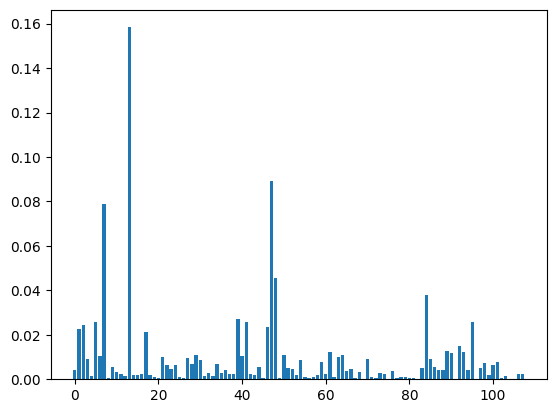

In [8]:
from matplotlib import pyplot
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

importance = np.mean([
    tree.feature_importances_ for tree in bg.estimators_
], axis=0)

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [9]:
score = pd.DataFrame(importance)
gene_score = pd.DataFrame(deg_genes_ID)
gene_score["score"] = score
gene_score

,SID,score
0,SLC39A8,0.004203
1,RHAG,0.022476
2,DDIT4,0.024300
3,MPO,0.008978
4,RRM2,0.001682
...,...,...
103,KIF2C,0.001400
104,POLE2,0.000000
105,UBE2C,0.000000
106,AURKB,0.002327


In [10]:
gene = []
for i in deg_genes_ID:
    gene.append(i)
gene_rank = []
gene_score_ind = []
for i in range(108):
    max_ind = np.argmax(importance)
    gene_rank.append(gene[max_ind])
    gene_score_ind.append(max_ind)
    importance[max_ind] = 0
a = gene_score_ind
total_comb = [None]*108
for i in range(108):
    arr = []
    for j in range(0, i + 1):
        arr.append(a[j])
    total_comb[i] = arr

In [12]:
for val in total_comb:
    print(val)

[13]
[13, 47]
[13, 47, 7]
[13, 47, 7, 48]
[13, 47, 7, 48, 84]
[13, 47, 7, 48, 84, 39]
[13, 47, 7, 48, 84, 39, 5]
[13, 47, 7, 48, 84, 39, 5, 41]
[13, 47, 7, 48, 84, 39, 5, 41, 95]
[13, 47, 7, 48, 84, 39, 5, 41, 95, 2]
[13, 47, 7, 48, 84, 39, 5, 41, 95, 2, 46]
[13, 47, 7, 48, 84, 39, 5, 41, 95, 2, 46, 1]
[13, 47, 7, 48, 84, 39, 5, 41, 95, 2, 46, 1, 17]
[13, 47, 7, 48, 84, 39, 5, 41, 95, 2, 46, 1, 17, 92]
[13, 47, 7, 48, 84, 39, 5, 41, 95, 2, 46, 1, 17, 92, 89]
[13, 47, 7, 48, 84, 39, 5, 41, 95, 2, 46, 1, 17, 92, 89, 61]
[13, 47, 7, 48, 84, 39, 5, 41, 95, 2, 46, 1, 17, 92, 89, 61, 93]
[13, 47, 7, 48, 84, 39, 5, 41, 95, 2, 46, 1, 17, 92, 89, 61, 93, 90]
[13, 47, 7, 48, 84, 39, 5, 41, 95, 2, 46, 1, 17, 92, 89, 61, 93, 90, 64]
[13, 47, 7, 48, 84, 39, 5, 41, 95, 2, 46, 1, 17, 92, 89, 61, 93, 90, 64, 29]
[13, 47, 7, 48, 84, 39, 5, 41, 95, 2, 46, 1, 17, 92, 89, 61, 93, 90, 64, 29, 50]
[13, 47, 7, 48, 84, 39, 5, 41, 95, 2, 46, 1, 17, 92, 89, 61, 93, 90, 64, 29, 50, 6]
[13, 47, 7, 48, 84, 39, 5, 

In [13]:
#Gene_validation
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
 
from sklearn.svm import SVC
# in and out files
markers_file = './results/sepsis/fs_scores.csv'

out_file = './results/sepsis/fs_scores.csv'
is_save_results = True

# data pre-processing
is_normalize_samples = False
is_normalize_columns = True
norm_filter = MinMaxScaler()

# experiment
num_folds = 5

label = 'Died'
# Set random seed
seed = 8
np.random.seed(seed)

In [14]:
def evaluate2(y_pred, y_test, y_probs):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    mcc = matthews_corrcoef(y_test, y_pred)
    auc = roc_auc_score(y_test, y_probs)
    for i in range(len(y_test)):
        if (y_pred[i]==1 and y_test[i]==1):
            tp = tp + 1
        elif (y_pred[i]==0 and y_test[i]==0):
            tn = tn + 1
        elif (y_pred[i]==1 and y_test[i]==0):
            fp = fp + 1
        else:
            fn = fn + 1
    sn = tp/(tp+fn)
    sp = tn/(tn+fp)
    fpr = fp/(tn+fp)
    acc = (tp+tn)/(tp+fp+tn+fn)
    return  np.array([acc, sn, sp, mcc, auc])

In [15]:
#5 fold CV 
from sklearn.model_selection import StratifiedKFold, KFold
from scipy import interp
from sklearn.metrics import *
def do_cross_validation_for_sing_model(X_comb, new_y, model, num_folds=5, random_state = 0, n_runs = 5):
   
    res = np.zeros(shape=(num_folds * n_runs, 5)) # 5 is the number of metrics #5 or 4?
    count = 0
    for cv_run in range(n_runs):
        skf = StratifiedKFold(n_splits=num_folds, shuffle=True)
        for train_index, test_index in skf.split(X_comb, new_y):
            X_train2, X_test2 = X_comb[train_index], X_comb[test_index]
            y_train2, y_test2 = new_y[train_index], new_y[test_index]
            
            train_filtered = X_train2
            test_filtered = X_test2

            model.fit(train_filtered, y_train2)
            Y_probs = model.predict_proba(test_filtered)[:, 1]
            Y_pred = model.predict(test_filtered)

            res[count, :] = evaluate2(Y_pred, y_test2, Y_probs)
            count += 1
            
    return res

In [16]:
import math
def std_mean_cal(res):
    means = [None]*5
    stds = [None]*5
    for i in range(5):
        mean = round(np.mean(res[:,i]),2)
        means[i] = mean
        std = sum(np.square(res[:,i] - means[i]))/25
        stds[i] = round(np.std(res[:,i]),2)
    M = [means, stds]
    return M

In [18]:
# classifiers
models = {
  'RF': RandomForestClassifier(n_estimators=100,  random_state=seed),
  'Bagging': BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=100, random_state=seed), n_estimators=10, random_state=seed),  
  'Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=seed)
}
print('Performance reported using:\t ACC\tSn\tSp\tMCC\tAUC')

model_name = ['RF', 'Bagging', 'Boosting']


for model in model_name:
    count = 0
    total = []
#     print(models[model])
    for comb in total_comb:
        X_comb = pd.DataFrame((X_train)[:,comb])
        num_runs = 5
        res = do_cross_validation_for_sing_model(X_comb.values, y_train, model=models[model], num_folds=5, n_runs=5)
        result = std_mean_cal(res)
        count += 1
        mean_std = {
            "Comb": comb,
            "ACC": str((result[0])[0]) + "+-" + str((result[1])[0]),
            "Sn": str((result[0])[1]) + "+-" + str((result[1])[1]),
            "Sp": str((result[0])[2]) + "+-" + str((result[1])[2]),
            "Mcc": str((result[0])[3]) + "+-" + str((result[1])[3]),
            "AUC": str((result[0])[4]) + "+-" + str((result[1])[4])
        }
        total.append(mean_std)
        print(res)
        print(count)
        print('---------------------------------------------------------------')

Performance reported using:	 ACC	Sn	Sp	MCC	AUC
[[ 0.82142857  0.25        0.91666667  0.18856181  0.65625   ]
 [ 0.82142857  0.5         0.875       0.34262414  0.78645833]
 [ 0.67857143  0.          0.79166667 -0.19034675  0.49479167]
 [ 0.89285714  0.25        1.          0.47140452  0.9375    ]
 [ 0.85185185  0.75        0.86956522  0.5294143   0.95108696]
 [ 0.78571429  0.25        0.875       0.125       0.60416667]
 [ 0.85714286  0.5         0.91666667  0.41666667  0.65104167]
 [ 0.85714286  0.5         0.91666667  0.41666667  0.83333333]
 [ 0.78571429  0.25        0.875       0.125       0.67708333]
 [ 0.74074074  0.25        0.82608696  0.06958374  0.66847826]
 [ 0.85714286  0.5         0.91666667  0.41666667  0.76041667]
 [ 0.82142857  0.25        0.91666667  0.18856181  0.703125  ]
 [ 0.85714286  0.75        0.875       0.53300179  0.77604167]
 [ 0.78571429  0.          0.91666667 -0.1132277   0.734375  ]
 [ 0.81481481  0.25        0.91304348  0.18430245  0.8423913 ]
 [ 0.821

In [19]:
#export
(pd.DataFrame(total)).to_csv("D:/Na/ReGeneL/gene_imp by bagging/result_bg.csv")

In [28]:
from sklearn.metrics import *
def evaluate(y_probs, y_pred, y_test):
    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # mathew correlation coefficients
    mcc = matthews_corrcoef(y_test, y_pred)
 
    auc = roc_auc_score(y_test, y_probs)
    tp = cm[1,1]
    fp = cm[0,1]
    tn = cm[0,0]
    fn = cm[1,0]
    acc = (tn+tp)/(tn+fp+fn+tp)
    ap = tp + fn
    an = tn + fp
    total = ap + an
    # compute sn and sp
    sn = tp/ap
    sp = tn/an
    tpr = sn
    fpr = fp/(fp+tn)
    percision = tp/(tp+fp)

    #calculate AUC score
    return  np.array([acc, sn, sp, mcc, auc,tpr,fpr,percision])

RandomForest: 
Evaluate score:
ACC	Sn	Sp	MCC	AUC
 [0.91666667 0.5        0.98076923 0.5913124  0.70913462 0.5
 0.01923077 0.8       ]
Bagging: 
Evaluate score:
ACC	Sn	Sp	MCC	AUC
 [0.91666667 0.375      1.         0.58489765 0.71274038 0.375
 0.         1.        ]
Boosting: 
Evaluate score:
ACC	Sn	Sp	MCC	AUC
 [0.71666667 0.375      0.76923077 0.1132277  0.55408654 0.375
 0.23076923 0.2       ]


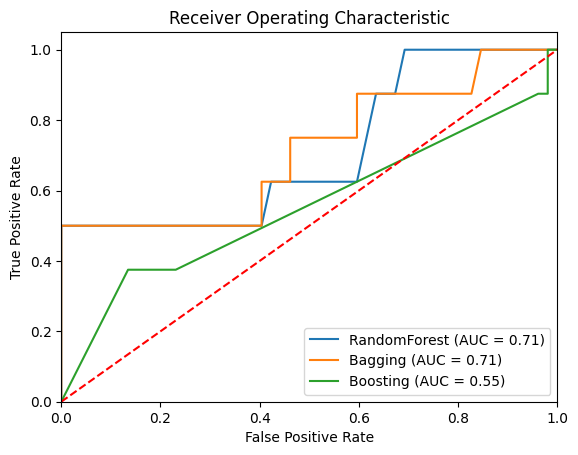

In [39]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
models1 = [
    {
        'label' : 'RandomForest',
        'model': RandomForestClassifier(n_estimators=100, random_state=7),
    },
    {
        'label' : 'Bagging',
        'model': BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=100, random_state=42), n_estimators=10, random_state=seed),
    },
    {
        'label' : 'Boosting',
        'model': GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
    },
]
plt.figure(0).clf()

for m in models1:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
#     auc = metrics.auc(fpr,tpr)
    score = evaluate(model.predict_proba(X_test)[:,1],y_pred, y_test)
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (m['label'], score[4]))

    print("%s: \nEvaluate score:\nACC\tSn\tSp\tMCC\tAUC\n" % (m['label']), score)
# # Custom settings for the plot 

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")